In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

# Define the path to the CSV file
data_file_path = "C:/Users/wdd45/OneDrive/바탕 화면/딥러닝응용/WISDM.csv"

# Load the data from the CSV file
data = pd.read_csv(data_file_path)

In [17]:
# Balance data for 'Sitting' and 'Jogging'
sitting_data = data[data['activity'] == 'Sitting'].head(4500).copy()
jogging_data = data[data['activity'] == 'Jogging'].head(4500).copy()


In [18]:
# Concatenate the balanced data
balanced_data = pd.concat([sitting_data, jogging_data])


In [19]:
# Encode the 'activity' column using LabelEncoder
label_encoder = LabelEncoder()
balanced_data['activity'] = label_encoder.fit_transform(balanced_data['activity'])


In [20]:
# Select only the specified columns
selected_columns = ['activity', 'X', 'Y', 'Z']
balanced_data = balanced_data[selected_columns]


In [21]:
# Split the data into training and testing sets
X_train, X_test = train_test_split(balanced_data, test_size=0.25, random_state=42)


In [22]:
# Separate 'Normal' data for training
normal = X_train[X_train['activity'] == 0]
y_train = normal['activity']
X_train_normal_train = normal.drop(['activity'], axis=1)


In [23]:
# Separate target and features for testing
y_test = X_test['activity']
X_test = X_test.drop(['activity'], axis=1).values


In [24]:
# Add noise to the training and testing sets
noise_factor = 0.5
X_train_noisy = X_train_normal_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_normal_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)


In [25]:
# Clip the values to be in the range [0, 1]
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)


In [26]:
# Model Training
input_dim = X_train_normal_train.shape[1]
encoding_dim = 14


In [27]:
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [28]:
nb_epoch = 100
batch_size = 32


In [29]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [30]:
checkpointer = ModelCheckpoint(filepath="model.h5", verbose=0, save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True)


In [31]:
history = autoencoder.fit(X_train_noisy, X_train_normal_train, epochs=nb_epoch, batch_size=batch_size, shuffle=True,
                          validation_data=(X_test_noisy, X_test), verbose=1, callbacks=[checkpointer, tensorboard]).history

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 92/106 [=========================>....] - ETA: 0s - loss: 66.7948 - accuracy: 0.4660WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001EBED5B1E58> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=1

Epoch 44/100
106/106 [==============================] - 0s 3ms/step - loss: 23.0801 - accuracy: 0.7743 - val_loss: 20.2354 - val_accuracy: 0.6333
Epoch 45/100
106/106 [==============================] - 0s 3ms/step - loss: 23.0640 - accuracy: 0.7740 - val_loss: 20.2085 - val_accuracy: 0.6329
Epoch 46/100
106/106 [==============================] - 0s 3ms/step - loss: 23.0320 - accuracy: 0.7746 - val_loss: 20.6341 - val_accuracy: 0.6333
Epoch 47/100
106/106 [==============================] - 0s 3ms/step - loss: 23.0222 - accuracy: 0.7746 - val_loss: 20.3617 - val_accuracy: 0.6329
Epoch 48/100
106/106 [==============================] - 1s 5ms/step - loss: 23.0348 - accuracy: 0.7749 - val_loss: 20.3478 - val_accuracy: 0.6329
Epoch 49/100
106/106 [==============================] - 1s 5ms/step - loss: 23.0094 - accuracy: 0.7743 - val_loss: 20.3292 - val_accuracy: 0.6333
Epoch 50/100
106/106 [==============================] - 1s 5ms/step - loss: 23.0775 - accuracy: 0.7743 - val_loss: 20.1705 -

106/106 [==============================] - 0s 4ms/step - loss: 22.9310 - accuracy: 0.7749 - val_loss: 20.4805 - val_accuracy: 0.6329


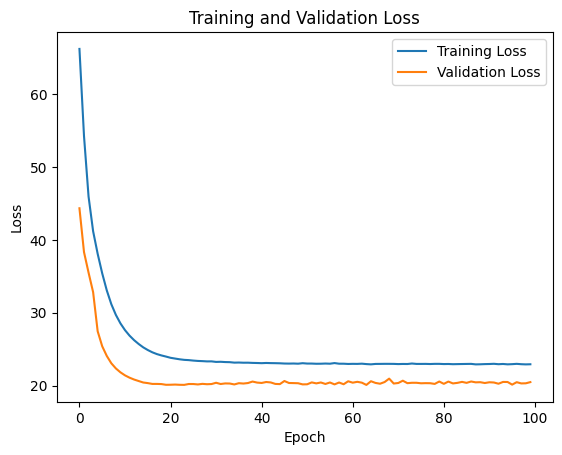

In [32]:
# Plot the training loss and validation loss
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()